In [2]:
%aiida
%load_ext autoreload
%autoreload 2

In [156]:
import numpy as np
n = load_node(56602)

In [157]:
xgrids = n.inputs.twinboundary_conf.get_dict()['xgrids']

10


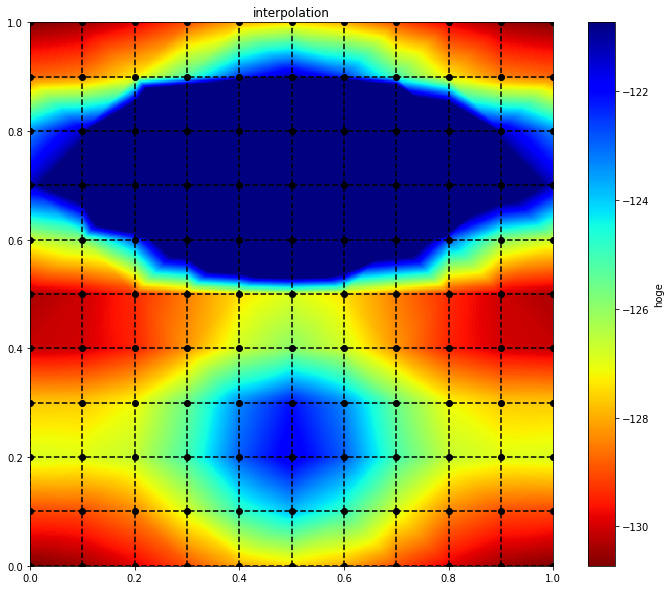

In [164]:
import numpy as np
from scipy import stats
from scipy import interpolate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def shift_energy_plot(ax, shifts, eneriges):
    xyz = np.hstack((shifts, energies.reshape(energies.shape[0],1)))
    x1 = xyz[np.isclose(xyz[:,0], 0)] + np.array([1,0,0])
    y1 = xyz[np.isclose(xyz[:,1], 0)] + np.array([0,1,0])
    xy1 = x1[np.isclose(x1[:,1], 0)] + np.array([0,1,0])
    full_xyz = np.vstack((xyz, x1, y1, xy1))
    sort_ix = np.argsort((xgrids+1)*full_xyz[:,0] + full_xyz[:,1])
    print(xgrids)
    sort_xyz = full_xyz[sort_ix]
    
    xy = sort_xyz[:,:2]
    z = sort_xyz[:,2]
    
    x = y = np.linspace(0, 1, 500)
    X, Y = np.meshgrid(x, y)
    
    i_Z = interpolate.griddata(xy, z, (X, Y), method='linear')
    
    # plot interpolation Z
    im = ax.pcolormesh(X, Y, i_Z, cmap="jet_r", vmax=min(energies)+10)
    plt.colorbar(im, ax=ax, fraction=0.20, label='hoge')
    ax.scatter(xy[:,0], xy[:,1], c='k')
    for i in np.unique(shifts[:,0]):
        ax.axhline(i, c='k', linestyle='--')
    for i in np.unique(shifts[:,1]):
        ax.axvline(i, c='k', linestyle='--')
    # axes[1].contour(X, Y, i_Z, colors=["black"])
    ax.set_title("interpolation")
    


fig = plt.figure(figsize=(12.5,10))
ax = fig.add_subplot(111)
shift_energy_plot(ax, shifts, energies)

In [162]:
shifts = np.array(n.outputs.twinboundary_summary.get_dict()['shifts'])
# energies = np.array(n.outputs.vasp_results.get_dict()['energies'])
# n.outputs.vasp_results.get_dict()
shifts.shape

(100, 2)

In [143]:
n.outpu

<NodeLinksManager: Manager for outgoing RETURN links for node pk=54370>

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9, 110,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19, 111,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29, 112,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39, 113,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  49, 114,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
       115,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69, 116,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79, 117,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89, 118,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 119, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 120])

In [109]:
full_xyz[sort_ix]

array([[ 0.00000000e+00,  0.00000000e+00, -1.30727808e+02],
       [ 0.00000000e+00,  1.00000000e-01, -1.29093107e+02],
       [ 0.00000000e+00,  2.00000000e-01, -1.26852023e+02],
       [ 0.00000000e+00,  3.00000000e-01, -1.27681693e+02],
       [ 0.00000000e+00,  4.00000000e-01, -1.30100772e+02],
       [ 0.00000000e+00,  5.00000000e-01, -1.30343230e+02],
       [ 0.00000000e+00,  6.00000000e-01, -1.26752867e+02],
       [ 0.00000000e+00,  7.00000000e-01, -1.21220082e+02],
       [ 0.00000000e+00,  8.00000000e-01, -1.23323401e+02],
       [ 0.00000000e+00,  9.00000000e-01, -1.28732691e+02],
       [ 0.00000000e+00,  1.00000000e+00, -1.30727808e+02],
       [ 1.00000000e-01,  0.00000000e+00, -1.30487038e+02],
       [ 1.00000000e-01,  1.00000000e-01, -1.29013324e+02],
       [ 1.00000000e-01,  2.00000000e-01, -1.26924761e+02],
       [ 1.00000000e-01,  3.00000000e-01, -1.27658611e+02],
       [ 1.00000000e-01,  4.00000000e-01, -1.29997945e+02],
       [ 1.00000000e-01,  5.00000000e-01